# Simple Linear Regression with Scikit-learn

### Loading the Data and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# The advertising dataset captures sales revenue generated concerning advertisement spending
# across multiple channels like radio, TV, and newspapers.
advert = pd.read_csv('advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
advert.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'], axis=1, inplace=True)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Data Analysis

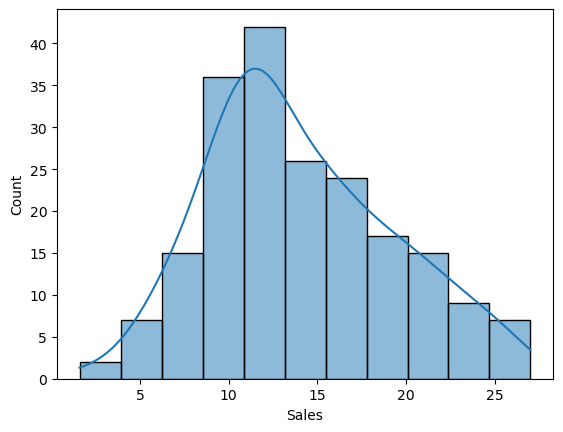

In [6]:
sns.histplot(advert.Sales, kde=True);

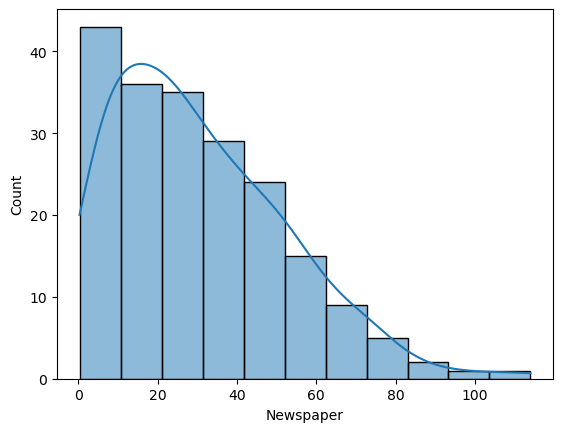

In [7]:
sns.histplot(advert.Newspaper, kde=True);

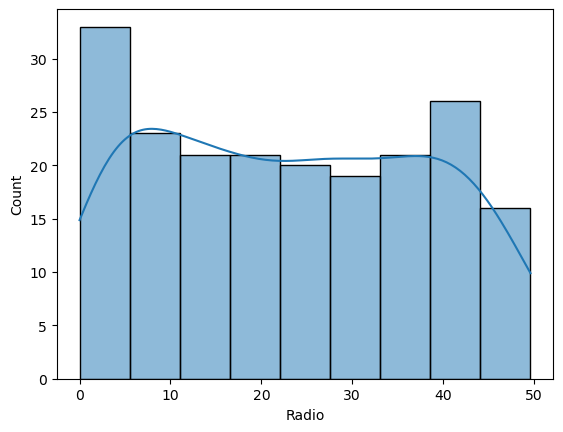

In [8]:
sns.histplot(advert.Radio, kde=True);

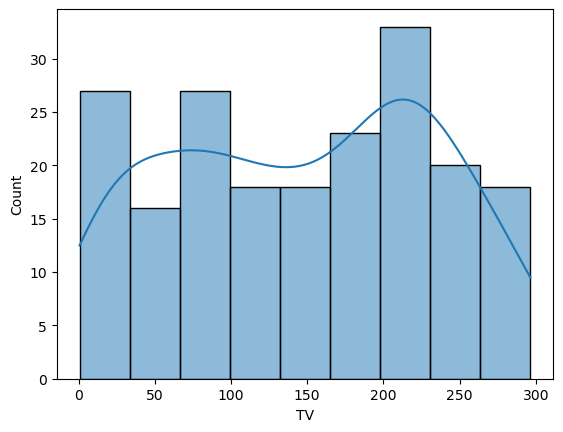

In [9]:
sns.histplot(advert.TV, kde=True);

### Relationships between Predictors and Response

/Users/alinakurliantseva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


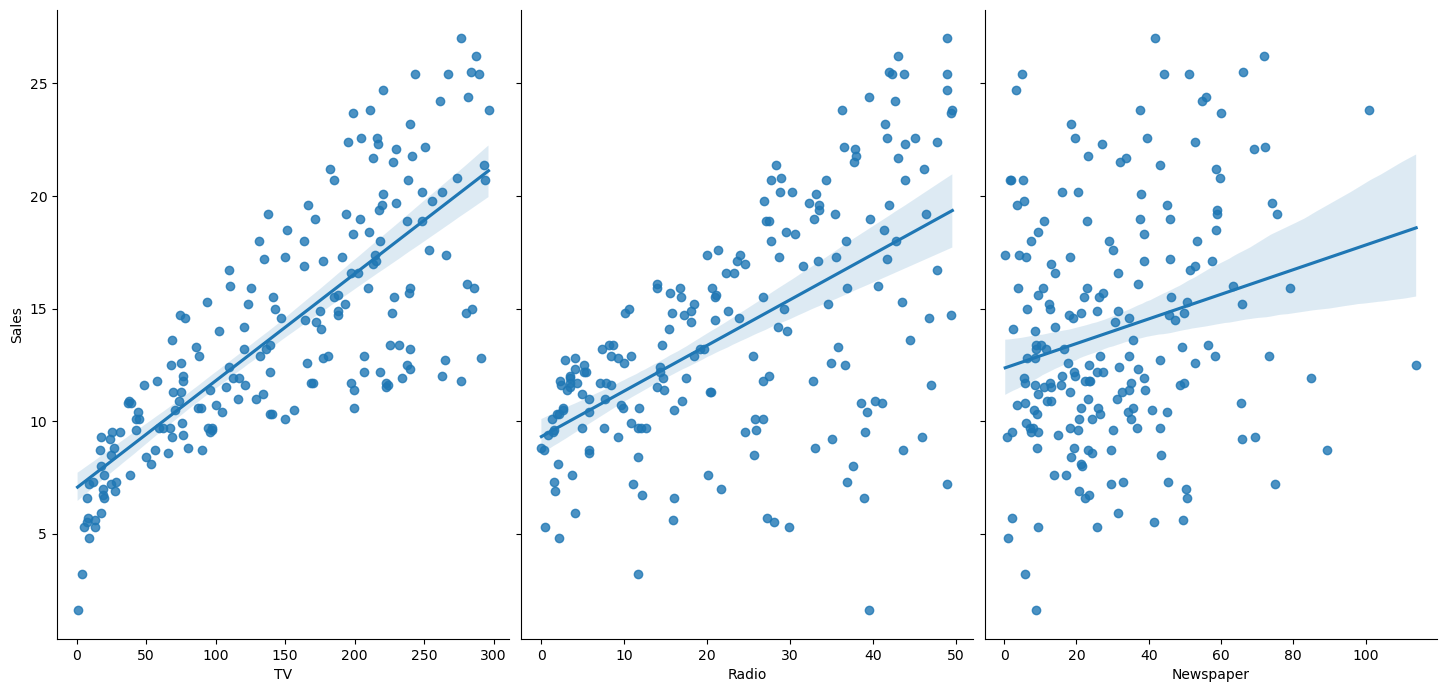

In [10]:
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
             height=7, aspect=0.7, kind='reg');

There is a strong correlation between TV ads and sales, while radio ads have a moderate correlation with sales, and newspaper ads have a weak or nonexistent correlation with sales.

In [11]:
advert.TV.corr(advert.Sales)

0.7822244248616066

In [12]:
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


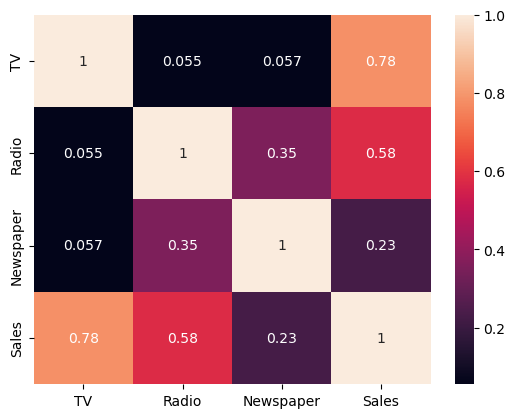

In [13]:
sns.heatmap(advert.corr(), annot=True);

### Simple Linear Regression Model

In [14]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [16]:
y = advert.Sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### Model Coefficients

In [19]:
print(linreg.intercept_)
print(linreg.coef_)

7.131784506685331
[0.04689446]


### Model Predictions

In [20]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([14.78964913, 16.29496116, 20.86717059,  7.68044964, 17.4626331 ])

### Model Evaluation Metrics

In [21]:
print(metrics.mean_absolute_error(y_test, y_pred))

2.273770594370873


In [22]:
print(metrics.mean_squared_error(y_test, y_pred))

9.179298570399794


In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.0297357261648736
